#  S&P500 Sector Wise Analysis

In [2]:
import yfinance as yf
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
sns.set()
from datetime import *
from yahoo_fin import stock_info as si


In [3]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)[0]
data_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
sp500_symbols = data_table["Symbol"].to_list()
sp500_symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

Get the Data using yfinance API

In [5]:
end_date = date.today()
start_date = end_date - pd.DateOffset(365*5) # 5 year data

In [6]:
stocks_list = si.tickers_sp500() # all s&p500 stocks
df_sp500 = yf.download(tickers = stocks_list, start = start_date, end = end_date)
sp500_symbols = df_sp500["Close"].columns.to_list()
df = df_sp500.sort_index()
df.head()

[*********************100%***********************]  503 of 503 completed


Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2018-05-07  64.931961  41.541306  107.888771  44.129219  78.895020  78.118706   
2018-05-08  64.912727  42.089443  108.501869  44.341351  78.712898  78.118706   
2018-05-09  65.644997  40.621212  109.607315  44.653553  80.122444  78.146393   
2018-05-10  66.348373  41.149776  109.830292  45.292282  81.444893  78.893517   
2018-05-11  66.916847  41.697910  111.418800  45.120022  82.498077  80.138748   

                                                          ...   Volume  \
                  ABT       ACGL         ACN        ADBE  ...     WYNN   
Date                                                      ...            
2018-05-07  54.640945  26.376667  141.805466  230.990005  ...  1936000   
2018-05-08  54.079071  26.663334  141.470245  234.559998  ...  1261600   
2018-05-09  54.714642  26.459999  143.965607  239.740005  ...  3152400   
2018-05-10  55.783142  26.523333  145.753296  241.149994  ...  2749300   
2018-05-11  56.427921  26.549999  146.256058  241.880005  ...  1899800   

                                                                            \
                XEL       XOM     XRAY      XYL      YUM      ZBH     ZBRA   
Date                                                                         
2018-05-07  1981700  15071500  5235200   943800  3366400  1471561   426500   
2018-05-08  4135800  17430400  5638600  1530700  1641000  1344768  1501200   
2018-05-09  3378700  17142100  3114500  1538300  1780200  1302641   536100   
2018-05-10  2255600  17710300  4435200  1150000  2375800  1178526   375800   
2018-05-11  1970600  14751000  2472900  1737100  1419400   973041   445400   

                              
               ZION      ZTS  
Date                          
2018-05-07  1774000  2021800  
2018-05-08  3088400  2534400  
2018-05-09  2355800  3009300  
2018-05-10  2069100  1977600  
2018-05-11  1436300  2210400  

[5 rows x 3018 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2018-05-07 to 2023-05-03
Columns: 3018 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2525), int64(493)
memory usage: 29.0 MB


Now we calculate: <br>
- Gap Return
- Intraday Return
- Variation per day
- Trailing Volatility over time

In [8]:
gap_returns = np.log(df["Open"]/df["Close"].shift(1))
intraday_returns = np.log(df["Close"]/df["Open"])
df_variation =  df["Adj Close"].pct_change()
df_volatility=df_variation.rolling(250).std()*100*np.sqrt(250)

Best Day to invest in S&P500? <br>
- Taking into account the return of the Gap movement
- Taking into account the return of intraday movements

In [9]:
weekday = gap_returns.index.map(lambda x: x.weekday())

best_day=pd.concat([
    gap_returns.groupby(weekday).mean().T.mean().rename("Gap_return mean"),
    gap_returns.groupby(weekday).std().T.mean().rename("Gap_return std"),
    
    intraday_returns.groupby(weekday).mean().T.mean().rename("IntraDay_return mean"),
    intraday_returns.groupby(weekday).std().T.mean().rename("IntraDay_return std"),
    
    df_volatility.groupby(weekday).mean().T.mean().rename("Volatility"),
],axis=1)

best_day.reset_index(inplace=True)
best_day["Date"] = best_day["Date"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri"})
best_day.rename(columns={"Date":"Day"},inplace=True)
best_day

,Day,Gap_return mean,Gap_return std,IntraDay_return mean,IntraDay_return std,Volatility
0,Mon,-0.000443,0.015639,0.000094,0.017830,35.670616
1,Tue,0.001839,0.012406,-0.001035,0.017730,35.592497
2,Wed,0.000437,0.012152,-0.000343,0.018302,35.696113
3,Thu,-0.001022,0.012816,0.001092,0.018913,35.664740
4,Fri,0.000421,0.012088,0.000249,0.017430,35.376772


Text(0.5, 1.0, 'Mean IntraDay Return per Day of the Week')

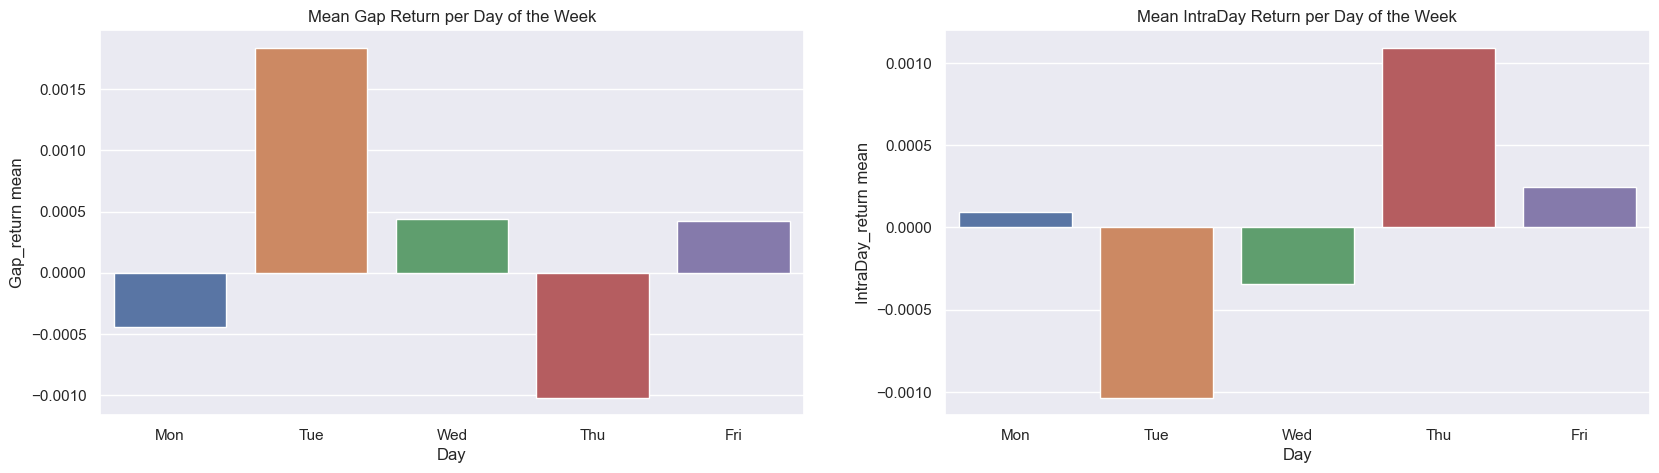

In [10]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.barplot(x=best_day["Day"],y=best_day["Gap_return mean"],ax=axs[0])
axs[0].set_title("Mean Gap Return per Day of the Week")

sns.barplot(x=best_day["Day"],y=best_day["IntraDay_return mean"],ax=axs[1])
axs[1].set_title("Mean IntraDay Return per Day of the Week")

The best day to invest according to the GAP return is Tuesday <br>
The best day to invest according to the Intra Daily return is Thursday

## What were the moments of high volatility that affected the S&P-500?

In [11]:
Vix = df_volatility.T.mean().dropna()
fig = px.line(x=Vix.index, y=Vix, title="S&P-500 Volatility Over Time",labels=dict(x="Date", y="Volatility"))
fig.show()

In the context of the plot, we see max volatility during February of 2021

## Sector-wise analysis of Companies in S&P500

In [12]:
df_perCompany=pd.DataFrame( data_table[['Symbol', 'GICS Sector']])
df_perCompany.rename(columns={"Symbol":"Ticker"},inplace=True)
df_perCompany

,Ticker,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,YUM,Consumer Discretionary
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials


In [13]:
for ticker in sp500_symbols:
    df_adjClose_ticker=df["Adj Close"][ticker].dropna()
    if df_adjClose_ticker.shape[0]==0:
        continue
    year_index = df_adjClose_ticker.index.map(lambda x: x.year)

    first_close, last_close = df_adjClose_ticker.iloc[[0,-1]]
    total_return = (last_close/first_close)-1
    first_year = df_adjClose_ticker.index[0].year
    last_year = df_adjClose_ticker.index[-1].year

    years=last_year-first_year+1
    returnPerYear=[]
    for year in range(first_year,last_year+1):
        first_close_year, last_close_year = df_adjClose_ticker[year_index==year].iloc[[0,-1]]
        year_return= (last_close_year/first_close_year)-1
        returnPerYear.append(year_return)
    mean_return_per_year = np.mean(returnPerYear)
    volatility = np.std(returnPerYear)
    df_perCompany.loc[df_perCompany["Ticker"]==ticker,["years","total_return","mean_return_per_year","volatility"]]=years,total_return,mean_return_per_year,volatility
    

In [14]:
df_perCompany

,Ticker,GICS Sector,years,total_return,mean_return_per_year,volatility
0,MMM,Industrials,6.0,-0.387748,-0.074400,0.118608
1,AOS,Industrials,6.0,0.214694,0.080261,0.319789
2,ABT,Health Care,6.0,1.045353,0.153628,0.181662
3,ABBV,Health Care,6.0,0.891754,0.129720,0.160658
4,ACN,Information Technology,6.0,0.940546,0.173489,0.336214
...,...,...,...,...,...,...
498,YUM,Consumer Discretionary,6.0,0.805248,0.116673,0.111928
499,ZBRA,Information Technology,6.0,0.880274,0.213814,0.414608
500,ZBH,Health Care,6.0,0.277284,0.061139,0.205538
501,ZION,Financials,6.0,-0.530138,-0.057463,0.348572


In [15]:
df_perCompany.dropna(inplace=True)

How to Know Which Company is Best to Invest? <br>
- Sharpe ratio
- Sortino Ratio
- Modigliani ratio
- Calmar Ratio

In [16]:
Rf = 0.01/255
df_perCompany["Return_Volatility_Ratio"] = (df_perCompany["mean_return_per_year"]*df_perCompany["total_return"])/((df_perCompany["volatility"]-Rf)*df_perCompany["years"])
df_perCompany

,Ticker,GICS Sector,years,total_return,mean_return_per_year,volatility,Return_Volatility_Ratio
0,MMM,Industrials,6.0,-0.387748,-0.074400,0.118608,0.040551
1,AOS,Industrials,6.0,0.214694,0.080261,0.319789,0.008982
2,ABT,Health Care,6.0,1.045353,0.153628,0.181662,0.147371
3,ABBV,Health Care,6.0,0.891754,0.129720,0.160658,0.120034
4,ACN,Information Technology,6.0,0.940546,0.173489,0.336214,0.080897
...,...,...,...,...,...,...,...
498,YUM,Consumer Discretionary,6.0,0.805248,0.116673,0.111928,0.139946
499,ZBRA,Information Technology,6.0,0.880274,0.213814,0.414608,0.075667
500,ZBH,Health Care,6.0,0.277284,0.061139,0.205538,0.013749
501,ZION,Financials,6.0,-0.530138,-0.057463,0.348572,0.014567


What are the 10 best companies to invest in?

In [17]:
top10_companies=df_perCompany.sort_values(by="Return_Volatility_Ratio",ascending=False)[0:10]
top10_companies

,Ticker,GICS Sector,years,total_return,mean_return_per_year,volatility,Return_Volatility_Ratio
174,ENPH,Information Technology,6.0,32.860565,1.572369,2.194736,3.923772
172,LLY,Health Care,6.0,5.008809,0.369055,0.182660,1.687040
233,HSY,Consumer Staples,6.0,2.329956,0.240429,0.105929,0.881719
57,AXON,Industrials,6.0,3.916092,0.323429,0.240420,0.878176
27,AMD,Information Technology,6.0,6.042278,0.526853,0.607091,0.874004
148,DXCM,Health Care,6.0,4.482884,0.396231,0.356890,0.829599
392,PWR,Industrials,6.0,3.862322,0.356241,0.303247,0.756312
49,AJG,Financials,6.0,2.288882,0.241559,0.130178,0.708092
84,CDNS,Information Technology,6.0,4.051132,0.353669,0.339007,0.704471
107,CMG,Consumer Discretionary,6.0,3.904724,0.363332,0.357262,0.661917


<AxesSubplot: xlabel='Ticker', ylabel='Return_Volatility_Ratio'>

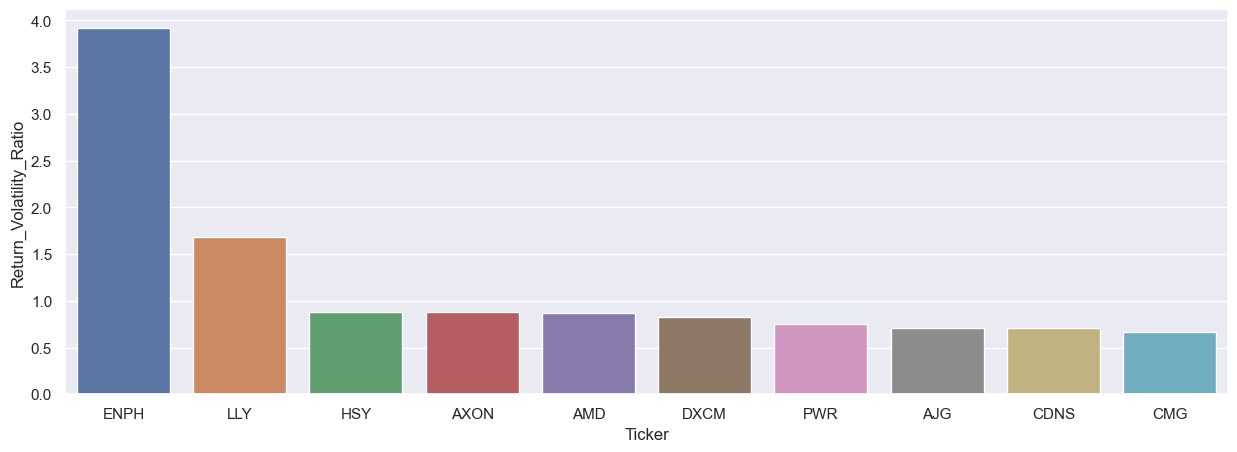

In [18]:
fig, axs=plt.subplots(1,1,figsize=(15,5))
sns.barplot(x=top10_companies["Ticker"],y=top10_companies["Return_Volatility_Ratio"])

In [19]:
fig = px.sunburst(top10_companies, path=['GICS Sector', 'Ticker'], values='Return_Volatility_Ratio',
                  color='total_return')
fig.show()

In [20]:
df_perSector=df_perCompany.groupby("GICS Sector").mean()
Rf = 0.01/255
df_perSector["Return_Volatility_Ratio"] = (df_perSector["mean_return_per_year"]*df_perSector["total_return"])/((df_perSector["volatility"]-Rf)*df_perSector["years"])
df_perSector.sort_values("Return_Volatility_Ratio",ascending=False,inplace=True)
df_perSector

C:\Users\anura\AppData\Local\Temp\ipykernel_13024\3978100931.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,years,total_return,mean_return_per_year,volatility,Return_Volatility_Ratio
GICS Sector,,,,,
Information Technology,6.000000,1.721592,0.200544,0.377049,0.152629
Health Care,5.892308,1.026657,0.146257,0.244611,0.104196
Consumer Staples,6.000000,0.771076,0.112873,0.176493,0.082207
Industrials,5.945946,0.823925,0.127116,0.245706,0.071700
Utilities,5.866667,0.505148,0.102261,0.168361,0.052312
Consumer Discretionary,6.000000,0.764476,0.128192,0.334121,0.048890
Materials,5.931034,0.561946,0.102579,0.245615,0.039576
Real Estate,6.000000,0.420508,0.107659,0.296801,0.025425
Financials,6.000000,0.403632,0.073065,0.250039,0.019661


<AxesSubplot: xlabel='GICS Sector', ylabel='Return_Volatility_Ratio'>

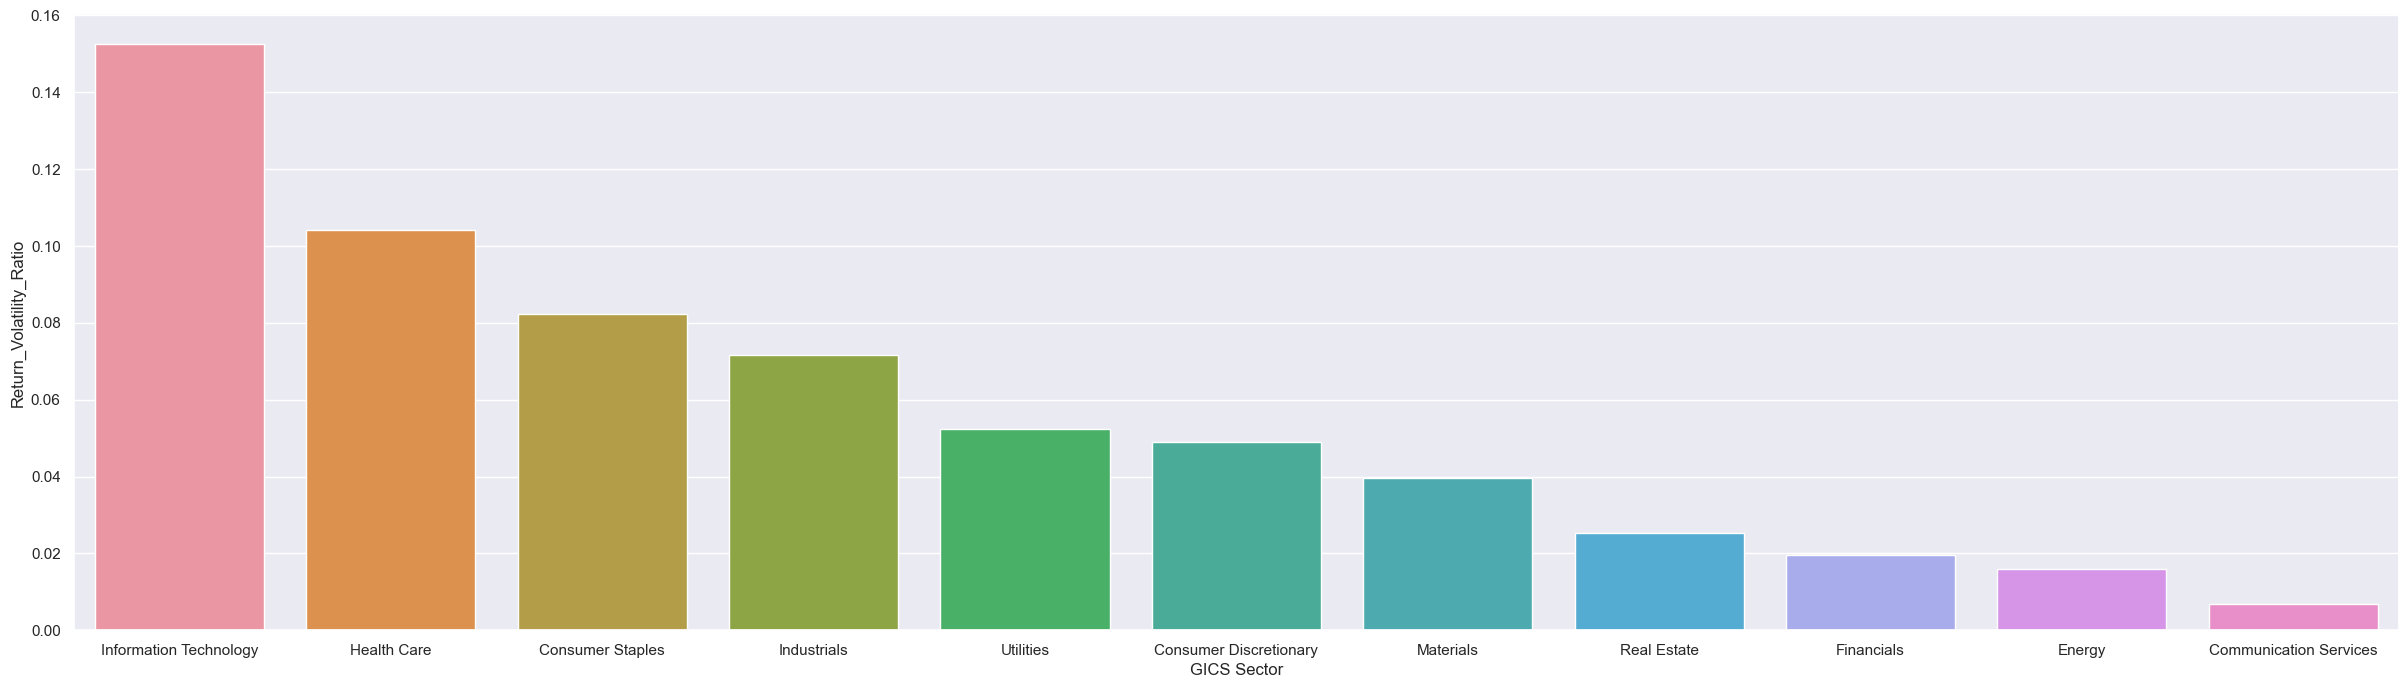

In [21]:
fig, axs=plt.subplots(1,1,figsize=(30,8))
sns.barplot(x=df_perSector.index, y=df_perSector["Return_Volatility_Ratio"])

In [22]:
min_ratio=df_perCompany["total_return"].min()
max_ratio=df_perCompany["total_return"].max()
total_return_scale = (df_perCompany["total_return"]+1-min_ratio)/(max_ratio-min_ratio)

fig = px.sunburst(df_perCompany, path=['GICS Sector',"Ticker"], values=total_return_scale,
                  color='volatility')
fig.show()

In [23]:
fig.update_layout(
    width=800,  # specify the desired width
    height=600,  # specify the desired height
)
